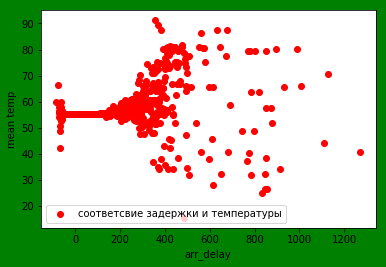

'зависимость задержек от температуры: чаще всего большие задержки (взлета) происходят при сильных отклонениях средней температуры'

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
url1 = "https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv"
url2 = "https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv"
weather = pd.read_csv(url1) 
flights = pd.read_csv(url2) 
X = flights["arr_delay"].dropna().unique()
X.sort()
Y = np.empty(len(X))
for i in range(len(X)):
	fm = X[i] == flights["arr_delay"]
	w1 = weather["day"].isin(flights[fm]["day"])
	w2 = weather["month"].isin(flights[fm]["month"])
	Y[i] = sum(weather[w1&w2]["temp"].dropna())/len(weather[w1&w2]["temp"].dropna())
fig = plt.figure()
fig.set(facecolor = 'green')
plt.xlabel("arr_delay")
plt.ylabel("mean temp")
plt.scatter(X, Y, label = u'соответсвие задержки и температуры', color='r')
plt.legend() 
plt.show()
"""зависимость задержек от температуры: чаще всего большие задержки (взлета) происходят при сильных отклонениях средней температуры"""

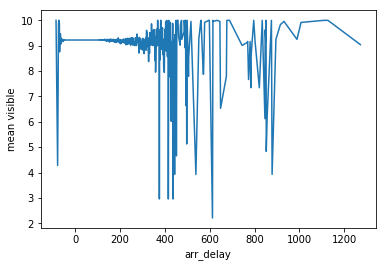

'плохая видимость не является важнейшей причиной задержек(взлета)'

In [7]:

for i in range(len(X)):
	fm = X[i] == flights["arr_delay"]
	w1 = weather["day"].isin(flights[fm]["day"])
	w2 = weather["month"].isin(flights[fm]["month"])
	Y[i] = sum(weather[w1&w2]["visib"].dropna())/len(weather[w1&w2]["visib"].dropna())
plt.xlabel("arr_delay")
plt.ylabel("mean visible")
plt.plot(X,Y)
plt.show()
"""плохая видимость не является важнейшей причиной задержек(взлета)"""

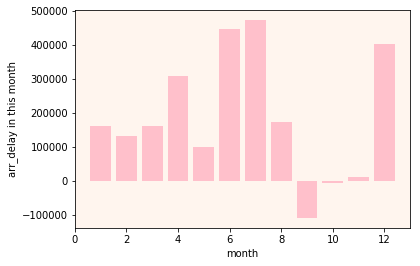

'в летние месяцы рейсы больше всего задерживаются'

In [25]:
X = flights["month"].dropna().unique()
Y = np.empty(len(X))
X.sort()
for i in range(len(X)):
	fm = X[i] == flights["month"]
	Y[i] = sum(flights[fm]["arr_delay"].dropna())
fig, ax = plt.subplots()
ax.set_xlabel("month")
ax.set_ylabel("arr_delay in this month")
ax.set_facecolor('seashell')
ax.bar(X, Y, color = "pink")
plt.show()
"""в летние месяцы рейсы больше всего задерживаются"""

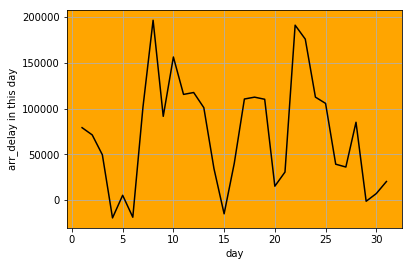

'в конкретные дни месяца задержек меньше, чем в другие(это мб связано с месячными зарплатами, сменами и тд)'

In [27]:
X = flights["day"].dropna().unique()
Y = np.empty(len(X))
X.sort()
for i in range(len(X)):
	fm = X[i] == flights["day"]
	Y[i] = sum(flights[fm]["arr_delay"].dropna())
fig, ax = plt.subplots()
ax.set_xlabel("day")
ax.set_ylabel("arr_delay in this day")
ax.set_facecolor("orange")
ax.plot(X,Y,color = "black")
ax.grid()
plt.show()
"""в конкретные дни месяца задержек меньше, чем в другие(это мб связано с месячными зарплатами, сменами и тд)"""

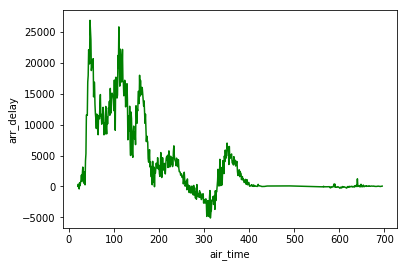

'суммарное время задержки(прилета), зависящее от общего времени полета\nотсюда можем понять, что при более длительном полете задержек меньше'

In [30]:
X = flights["air_time"].dropna().unique()
Y = np.empty(len(X))
X.sort()
for i in range(len(X)):
	fm = X[i] == flights["air_time"]
	Y[i] = sum(flights[fm]["arr_delay"].dropna())
plt.xlabel("air_time")
plt.ylabel("arr_delay")
plt.plot(X,Y,color = "green")
plt.show()
"""суммарное время задержки(прилета), зависящее от общего времени полета
отсюда можем понять, что при более длительном полете задержек меньше"""

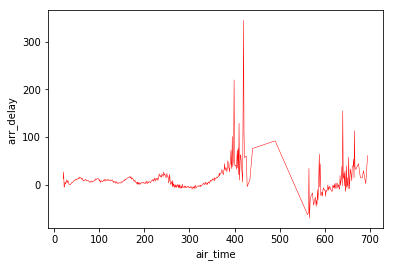

'среднее время задержки(прилета), зависящее от общего времени полета\nэти данные говорят нам о том, что в среднем задержки при длительных полетах дольше(но их меньше из пред пункта)'

In [29]:
X = flights["air_time"].dropna().unique()
Y = np.empty(len(X))
X.sort()
for i in range(len(X)):
	fm = X[i] == flights["air_time"]
	Y[i] = sum(flights[fm]["arr_delay"].dropna())/len(flights[fm]["arr_delay"].dropna())
plt.xlabel("air_time")
plt.ylabel("arr_delay ")
plt.plot(X,Y,color = 'r',linewidth = 0.5)
plt.show()
"""среднее время задержки(прилета), зависящее от общего времени полета
эти данные говорят нам о том, что в среднем задержки при длительных полетах дольше(но их меньше из пред пункта)"""